In [52]:
#import packages
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from bs4 import BeautifulSoup


from datetime import datetime, timedelta
from bsi_sentiment.twitter import search_tweets_sn

In [53]:
with open("nasdaq100.html", encoding='utf8') as file_reader:
    soup = BeautifulSoup(file_reader, "lxml")

In [49]:
#print(soup.prettify())

In [50]:
#soup.find_all("td", attrs = {"data-x":"4"})

In [54]:
company_listings = []
for idx in range(len(soup.find_all("td", attrs = {"data-x":"4"}))):
    if soup.find_all("td", attrs = {"data-x":"4"})[idx]['data-order'] == "X":
        company_listings.append(soup.find_all("td", attrs = {"data-x":"0"})[idx]['data-order'])
print(company_listings)

['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BMRN', 'CDNS', 'CERN', 'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'TCOM', 'CTSH', 'CTXS', 'DLTR', 'EA', 'EBAY', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA', 'GILD', 'GOOG', 'GOOGL', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MNST', 'MSFT', 'MU', 'MXIM', 'NFLX', 'NTAP', 'NTES', 'NVDA', 'NXPI', 'ORLY', 'PAYX', 'PCAR', 'BKNG', 'PYPL', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SIRI', 'SNPS', 'SWKS', 'TMUS', 'TSLA', 'TXN', 'ULTA', 'VRSK', 'VRSN', 'VRTX', 'WBA', 'WDC', 'XLNX', 'MELI', 'WDAY', 'TTWO', 'ASML', 'ALGN', 'PEP', 'AMD', 'LULU', 'UAL', 'WLTW', 'XEL', 'EXC', 'SPLK', 'CSGP', 'ANSS', 'CPRT', 'CDW', 'SGEN']


In [55]:
#get a company's ticker using a key
quandl.ApiConfig.api_key = 'LjVzy1VC64LF83o8h-Ko'

#Get list of tickers
ticker = pd.read_csv('ticker_list.csv')

In [56]:
#I suspect NASDAQ stocks wil be, on average, more sensitive to Twitter sentiment than "traditional" companies on NYSE, SP500, etc
nasdaq = ticker[ticker["Exchange"] == "NASDAQ"].reset_index(drop = True)
nasdaq100 = nasdaq[nasdaq['Ticker'].isin(company_listings)].reset_index(drop = True)

In [13]:
# list of all NASDAQ 100 stocks (EOY 2016) in Quandl's NASDAQ database
# list(nasdaq100['Ticker'])

# list of companies in NASDAQ 100 (EOY 2016) not in Quandl's NASDAQ database
# set(list(nasdaq100['Ticker'])) ^ set(company_listings)


In [14]:
#graphs of all NASDAQ 100 companies
#for code in nasdaq100["Quandl_Code"]:
#    company = quandl.get(code, start_date='2016-12-31', end_date='2020-12-31')
#    plt.plot(company["Open"])
#    plt.title(nasdaq100[nasdaq100["Quandl_Code"] == code].reset_index(drop = True)["Name"][0])
#    plt.show()

In [12]:
#Directory = r"C:\Users\Owner\Documents\git\Twitter-Stock-Analysis\quandl"

# ListOfTwitterHandles = pd.read_csv(os.path.join(Directory, 'Twitter Analysis', 'TwitterHandles.csv'))
ListOfTwitterHandles = pd.read_csv('TwitterHandles.csv')
ListOfTwitterHandles.Symbol.to_list()

['MSFT', 'AMZN', 'TSLA']

In [ ]:
#Moderna, PayPal, Zoom

In [26]:
#Handles = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'FB', 'GOOG', 'NVDA', 'PYPL', 'NFLX', 'INTC']
Handles = ['MSFT', 'AMZN', 'TSLA']
Tweetlist_BSI_df = pd.DataFrame()
for i, Handle in enumerate(Handles):
    tweets = search_tweets_sn(
    q = str(Handle),
    since = "2020-02-19",
    until="2020-03-19",
    lang="en",
    max_tweets=10000000
    )
    
    Tweetlist = pd.DataFrame(
        [[tweet.date, tweet.text, tweet.username, ListOfTwitterHandles.Company[i], ListOfTwitterHandles.Symbol[i], ListOfTwitterHandles.TwitterHandle1[i]] for tweet in tweets], 
        columns= ['Created','Text','User', 'Company', 'Symbol', 'TwitterHandle']
    )
    #Tweetlist_BSI_df = Tweetlist_BSI_df.append(Tweetlist)
    
    #Tweetlist.to_csv(os.path.join(Directory, 'Twitter Analysis'))
    Tweetlist.to_csv(str(Handle) + "_tweets.csv")

In [27]:
#Directory = r"W:\My Documents\UMich\MADS\M4\SIADS 591 - Milestone"

#TSLA_Tweets = pd.read_csv(os.path.join(Directory, 'Twitter Analysis', 'CompanyTweets', 'Tweets TSLA 20191201 to 20200601.csv'))
AMZN_Tweets = pd.read_csv('AMZN_tweets.csv')
AMZN_Tweets.head(20)

,Unnamed: 0,Created,Text,User,Company,Symbol,TwitterHandle
0,0,2020-03-31,UPDATE 2-Independent worker group calls for Wh...,newsfilterio,Amazon.com Inc,AMZN,@amazon
1,1,2020-03-31,"The Staten Island worker who was fired, Christ...",Bruno_J_Navarro,Amazon.com Inc,AMZN,@amazon
2,2,2020-03-31,"#TheMediaKnowsNothing. Turn off the TV, Follo...",Upticken,Amazon.com Inc,AMZN,@amazon
3,3,2020-03-31,Secretive big data company Palantir is reporte...,HPTarget,Amazon.com Inc,AMZN,@amazon
4,4,2020-03-31,Secretive big data company Palantir is reporte...,winsontang,Amazon.com Inc,AMZN,@amazon
5,5,2020-03-31,Business Insider - Secretive big data company ...,theluckyman,Amazon.com Inc,AMZN,@amazon
6,6,2020-03-31,Will be looking for $amzn short setup tomorrow...,easycomeeasygo,Amazon.com Inc,AMZN,@amazon
7,7,2020-03-31,"This Chart Shows E-Commerce Winners, Losers Du...",Benzinga,Amazon.com Inc,AMZN,@amazon
8,8,2020-03-31,Independent worker group calls for Whole Foods...,newsfilterio,Amazon.com Inc,AMZN,@amazon
9,9,2020-03-31,𝗪𝗵𝗲𝗿𝗲 𝗱𝗼 𝘆𝗼𝘂 𝗹𝗶𝗸𝗲 𝘁𝗼 𝘀𝗵𝗼𝗽 𝗺𝗼𝗿𝗲? 🛒🍲🍓🥖🥩\n\nWalma...,ForexinWorld,Amazon.com Inc,AMZN,@amazon


In [29]:
print(f"Number of Tweets: {len(AMZN_Tweets):,} between {min(AMZN_Tweets.Created)} and {max(AMZN_Tweets.Created)}")

Number of Tweets: 1,000 between 2020-03-30 and 2020-03-31


In [30]:
TweetsPerDay = AMZN_Tweets.pivot_table(index='Created', values='Text', aggfunc='count')
TweetsPerDay.reset_index(inplace=True)
TweetsPerDay.sort_values(by='Text', ascending=False)

idx = pd.date_range("2019-12-01","2020-06-01")
TweetsPerDay.index = pd.DatetimeIndex(TweetsPerDay.Created)
TweetsPerDay = TweetsPerDay.reindex(idx, fill_value=0)

del TweetsPerDay['Created']

In [32]:
#Tesla stock price (June 2017 - June 2019)
amznStock = quandl.get("EOD/AMZN", start_date='2019-12-1', end_date='2020-6-1')

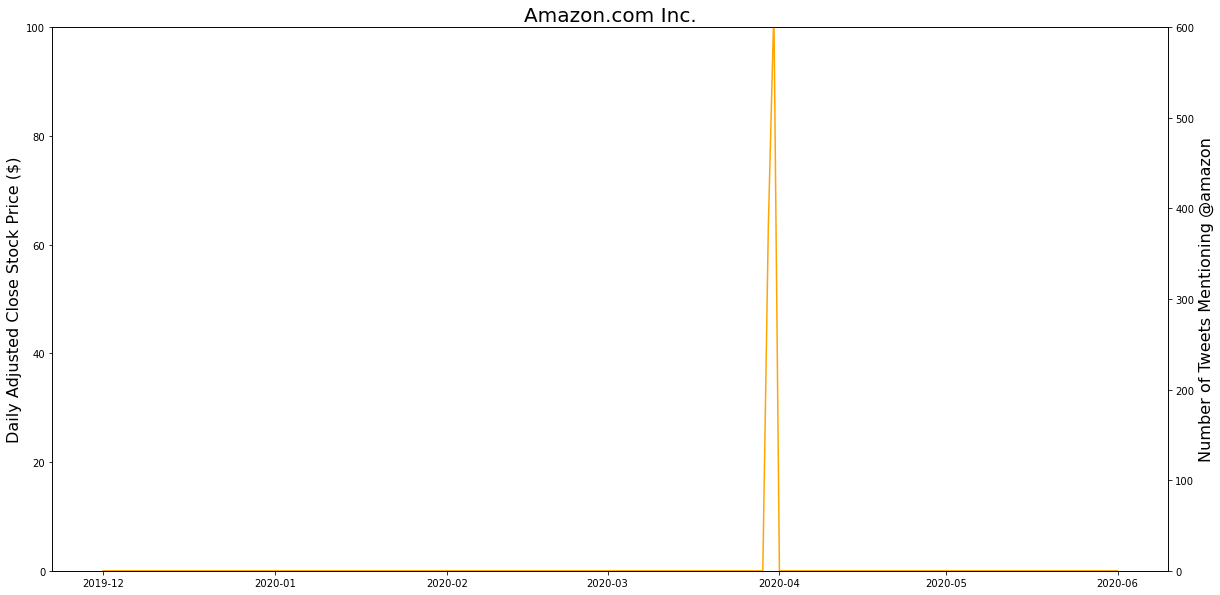

In [40]:
fig = plt.figure(figsize=(20,10))
ax1 = plt.axes()
ax1.plot(amznStock['Adj_Close'])
ax2 = ax1.twinx()
ax2.plot(TweetsPerDay, color='orange')
ax1.set_title(nasdaq100[nasdaq100["Quandl_Code"] == "EOD/AMZN"].reset_index(drop = True)["Name"][0], size=20)
#ax1.rcParams["figure.figsize"] = (20,10)
ax1.set_ylabel("Daily Adjusted Close Stock Price ($)", size=16)
ax2.set_ylabel("Number of Tweets Mentioning @amazon", size=16)
ax1.set_ylim(0,100)
ax2.set_ylim(0,600)
plt.show()